In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [272]:
pd.set_option("display.max_column",999)

### Loading Original Data

In [273]:
data=pd.read_excel("Original_Data.xlsx",header=3)

In [274]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Unnamed: 81,Unnamed: 82
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,NaN,NaN
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,NaN,NaN
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,NaN,NaN
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,NaN,NaN
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,NaN,NaN


#### Selecting features based on book description

In [275]:
#requires one-hot encoding
categorical=['LotShape']

#missing values
missing=['LotFrontage']

In [276]:
#no special treatment besides imputation etc
numerical_features=[
          'LotArea',
          'OverallQual',
        'OverallCond',
    'YearBuilt',
    'YearRemodAdd',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageCars',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
]

In [277]:
target="SalePrice"

In [278]:
#create a list to store all my features
features = numerical_features + categorical + missing
features

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'LotShape',
 'LotFrontage']

In [279]:
#separate data into features and target
X_raw = data[features].copy()
y_raw = data[target].copy()


In [280]:
#lets check our data
X_raw.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,LotShape,LotFrontage
0,8450,7,5,2003,2003,706,150,856,856,854,1710,2,1,3,8,0,2,548,0,61,0,Reg,65.0
1,9600,6,8,1976,1976,978,284,1262,1262,0,1262,2,0,3,6,1,2,460,298,0,0,Reg,80.0
2,11250,7,5,2001,2002,486,434,920,920,866,1786,2,1,3,6,1,2,608,0,42,0,IR1,68.0
3,9550,7,5,1915,1970,216,540,756,961,756,1717,1,0,3,7,1,3,642,0,35,272,IR1,60.0
4,14260,8,5,2000,2000,655,490,1145,1145,1053,2198,2,1,4,9,1,3,836,192,84,0,IR1,84.0


In [281]:
y_raw.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [282]:
#quick statistics
X_raw.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,LotFrontage
count,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2908.000000,2422.000000
mean,10120.229711,6.083906,5.566713,1971.296080,1984.254470,436.658528,560.858322,1047.269601,1154.885144,335.069120,1494.627235,1.566369,0.379298,2.861073,6.444635,0.594911,1.764787,471.883081,93.349381,47.099037,23.054677,69.083815
std,7794.469991,1.396532,1.111292,30.272561,20.884877,436.817163,439.823652,419.916367,375.324590,426.268871,486.035830,0.551506,0.502705,0.822347,1.554434,0.643243,0.760912,214.162896,126.262027,66.642347,64.200383,22.691072
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,7466.500000,5.000000,5.000000,1954.000000,1965.000000,0.000000,220.000000,793.000000,876.000000,0.000000,1125.750000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,320.000000,0.000000,0.000000,0.000000,59.000000
50%,9444.500000,6.000000,5.000000,1973.000000,1993.000000,368.000000,467.500000,988.500000,1082.000000,0.000000,1442.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,479.000000,0.000000,26.000000,0.000000,68.000000
75%,11521.500000,7.000000,6.000000,2001.000000,2004.000000,732.000000,804.500000,1300.000000,1383.000000,704.000000,1740.500000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,70.000000,0.000000,80.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,2288.000000,2336.000000,3206.000000,3820.000000,1862.000000,3820.000000,4.000000,2.000000,8.000000,14.000000,4.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,313.000000


### Notice that categorical variables still are in their "raw" form - still text

### Checking for the null values

In [283]:
X_raw.isnull().mean()

LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
BsmtFinSF1       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
GrLivArea        0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
LotShape         0.000000
LotFrontage      0.167125
dtype: float64

In [284]:
#for the full dataset
data.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.001032
LotFrontage      0.167125
LotArea          0.000000
                   ...   
SaleType         0.000344
SaleCondition    0.000000
SalePrice        0.000000
Unnamed: 81      1.000000
Unnamed: 82      0.999656
Length: 83, dtype: float64


### Converting the categorical variables to numbers

#### Neighborhood - we need to convert to one-hot representation = creating dummy variables (0/1)

In [285]:
X_processed = pd.get_dummies(X_raw,columns=categorical,)
X_processed.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,LotFrontage,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,8450,7,5,2003,2003,706,150,856,856,854,1710,2,1,3,8,0,2,548,0,61,0,65.0,0,0,0,1
1,9600,6,8,1976,1976,978,284,1262,1262,0,1262,2,0,3,6,1,2,460,298,0,0,80.0,0,0,0,1
2,11250,7,5,2001,2002,486,434,920,920,866,1786,2,1,3,6,1,2,608,0,42,0,68.0,1,0,0,0
3,9550,7,5,1915,1970,216,540,756,961,756,1717,1,0,3,7,1,3,642,0,35,272,60.0,1,0,0,0
4,14260,8,5,2000,2000,655,490,1145,1145,1053,2198,2,1,4,9,1,3,836,192,84,0,84.0,1,0,0,0


In [286]:
X_processed.shape

(2908, 26)

In [287]:
#dropping one of the categories
X_processed = pd.get_dummies(X_raw,columns=categorical,drop_first=True)
X_processed.shape

(2908, 25)

In [288]:
X_processed.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,LotFrontage,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,8450,7,5,2003,2003,706,150,856,856,854,1710,2,1,3,8,0,2,548,0,61,0,65.0,0,0,1
1,9600,6,8,1976,1976,978,284,1262,1262,0,1262,2,0,3,6,1,2,460,298,0,0,80.0,0,0,1
2,11250,7,5,2001,2002,486,434,920,920,866,1786,2,1,3,6,1,2,608,0,42,0,68.0,0,0,0
3,9550,7,5,1915,1970,216,540,756,961,756,1717,1,0,3,7,1,3,642,0,35,272,60.0,0,0,0
4,14260,8,5,2000,2000,655,490,1145,1145,1053,2198,2,1,4,9,1,3,836,192,84,0,84.0,0,0,0


### Imputing missing values with k-nearest-neighbour

In [289]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

X_processed[missing] = pd.DataFrame(imputer.fit_transform(X_processed[missing]),columns = missing)

X_processed.head()



,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,LotFrontage,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,8450,7,5,2003,2003,706,150,856,856,854,1710,2,1,3,8,0,2,548,0,61,0,65.0,0,0,1
1,9600,6,8,1976,1976,978,284,1262,1262,0,1262,2,0,3,6,1,2,460,298,0,0,80.0,0,0,1
2,11250,7,5,2001,2002,486,434,920,920,866,1786,2,1,3,6,1,2,608,0,42,0,68.0,0,0,0
3,9550,7,5,1915,1970,216,540,756,961,756,1717,1,0,3,7,1,3,642,0,35,272,60.0,0,0,0
4,14260,8,5,2000,2000,655,490,1145,1145,1053,2198,2,1,4,9,1,3,836,192,84,0,84.0,0,0,0


### Imputing missing values with mean

In [290]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# X_processed[missing] = pd.DataFrame(imputer.fit_transform(X_processed[missing]),columns = missing)

# X_processed.head()

### Imputing missing values with median

In [291]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='median')
# X_processed[missing] = pd.DataFrame(imputer.fit_transform(X_processed[missing]),columns = missing)

# X_processed.head()

Checking null values

In [292]:
X_processed.isnull().mean()

LotArea          0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
BsmtFinSF1       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
1stFlrSF         0.0
2ndFlrSF         0.0
GrLivArea        0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
LotFrontage      0.0
LotShape_IR2     0.0
LotShape_IR3     0.0
LotShape_Reg     0.0
dtype: float64

### Splitting into training and validation

In [293]:
#splitting data into training, validation and test
X_train, X_valid, X_test = X_processed.iloc[0:1800,:].copy(),  X_processed.iloc[1800:2400,:].copy(), X_processed.iloc[2400:,:].copy()


In [294]:
#lets check the shape
X_train.shape,X_valid.shape, X_test.shape

((1800, 25), (600, 25), (508, 25))

In [295]:
#we do for the sale price
y_train, y_valid, y_test = y_raw[0:1800].copy(), y_raw[1800:2400].copy(), y_raw[2400:]
y_train.shape,y_valid.shape, y_test.shape

((1800,), (600,), (508,))

### Standardizing the variables

In [296]:
#we will use the sklearn module called StandardScaler
from sklearn.preprocessing import StandardScaler

In [297]:
scaler = StandardScaler()

In [298]:
#fitting my scaler
scaler.fit(X_train)

StandardScaler()

In [299]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.19962752,  0.65292863, -0.51254975, ..., -0.15829386,
        -0.07474351,  0.76088591],
       [-0.07202494, -0.07254763,  2.19034931, ..., -0.15829386,
        -0.07474351,  0.76088591],
       [ 0.11105702,  0.65292863, -0.51254975, ..., -0.15829386,
        -0.07474351, -1.31425748],
       ...,
       [-0.2424576 , -0.07254763,  1.28938296, ..., -0.15829386,
        -0.07474351,  0.76088591],
       [-0.29727123, -0.07254763, -0.51254975, ..., -0.15829386,
        -0.07474351,  0.76088591],
       [-0.18253987, -0.79802388,  1.28938296, ..., -0.15829386,
        -0.07474351, -1.31425748]])

In [300]:
#saving into a dataframe
X_train_scaled = pd.DataFrame(X_train_scaled.tolist(),columns=X_train.columns)
X_train_scaled.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,LotFrontage,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,-0.199628,0.652929,-0.512550,1.039139,0.875997,0.598003,-0.937506,-0.482598,-0.809045,1.204323,0.423163,0.789873,1.209156,0.173492,0.961210,-0.947938,0.304125,0.348296,-0.750171,0.222481,-0.357272,-0.211172,-0.158294,-0.074744,0.760886
1,-0.072025,-0.072548,2.190349,0.136848,-0.432345,1.218867,-0.635218,0.490462,0.276435,-0.789640,-0.490791,0.789873,-0.769463,0.173492,-0.298017,0.608894,0.304125,-0.070815,1.637599,-0.719103,-0.357272,0.513762,-0.158294,-0.074744,0.760886
2,0.111057,0.652929,-0.512550,0.972303,0.827540,0.095834,-0.296837,-0.329209,-0.637935,1.232341,0.578209,0.789873,1.209156,0.173492,-0.298017,0.608894,0.304125,0.634054,-0.750171,-0.070799,-0.357272,-0.066186,-0.158294,-0.074744,-1.314257
3,-0.077573,0.652929,-0.512550,-1.901664,-0.723088,-0.520464,-0.057714,-0.722268,-0.528318,0.975507,0.437443,-1.039948,-0.769463,0.173492,0.331596,0.608894,1.649151,0.795984,-0.750171,-0.178850,4.060688,-0.452817,-0.158294,-0.074744,-1.314257
4,0.445043,1.378405,-0.512550,0.938885,0.730626,0.481591,-0.170508,0.210048,-0.036376,1.668958,1.418720,0.789873,1.209156,1.407819,1.590823,0.608894,1.649151,1.719934,0.788258,0.577505,-0.357272,0.707077,-0.158294,-0.074744,-1.314257


In [301]:
#scaling validation and test
#saving into a dataframe
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid).tolist(),columns = X_valid.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test).tolist(),columns = X_test.columns)



In [302]:
#scaling the target variable
y_train_scaled = (y_train - y_train.mean())/y_train.std()
y_valid_scaled = (y_valid - y_train.mean())/y_train.std()
y_test_scaled = (y_test - y_train.mean())/y_train.std()


### Lasso

#### Fitting a single model

In [303]:
#defining lambda term as 10% - we need to divide by two because the mean squared is divided by two
lasso = Lasso(alpha = 0.1/2)

In [304]:
#we fit the regression
lasso.fit(X_train_scaled,y_train_scaled)

Lasso(alpha=0.05)

In [305]:
#accessing the coefficients
lasso_coefs = pd.DataFrame()
lasso_coefs['variable']=  X_train.columns
lasso_coefs['beta']=  lasso.coef_
#appending the constant term
lasso_coefs = lasso_coefs.append({"variable":"constant", "beta":lasso.intercept_},ignore_index=True)
lasso_coefs

,variable,beta
0,LotArea,3.616620e-02
1,OverallQual,3.288408e-01
2,OverallCond,0.000000e+00
3,YearBuilt,5.843375e-02
4,YearRemodAdd,7.015630e-02
5,BsmtFinSF1,1.191057e-01
6,BsmtUnfSF,-0.000000e+00
7,TotalBsmtSF,1.294413e-01
8,1stFlrSF,2.273774e-02
9,2ndFlrSF,0.000000e+00


In [306]:
#computing the MSE 
#I need to generate my estimates
train_estimate = lasso.predict(X_train_scaled)
valid_estimate = lasso.predict(X_valid_scaled)
test_estimate = lasso.predict(X_test_scaled)


In [307]:
#importing mean squared error from sklearn
from sklearn.metrics import mean_squared_error


In [308]:
#compute the MSE
train_mse = mean_squared_error(y_train_scaled, train_estimate)
train_mse


0.1562756686803174

In [309]:
valid_mse = mean_squared_error(y_valid_scaled, valid_estimate)
valid_mse

0.14988414491581048

#### Repeat the same process for different levels of lambda

In [310]:
#generate the range of lambdas
lambdas = np.linspace(0.001, 1)/2

In [311]:
#create a results list to store my results
results = []

for l in lambdas:
    #define my model
    lasso = Lasso(alpha=l)
    
    #fit my model in the training set
    lasso.fit(X_train_scaled,y_train_scaled)
    
    #generate my estimate for the training and validation
    train_estimate = lasso.predict(X_train_scaled)
    valid_estimate = lasso.predict(X_valid_scaled)
    
    
    #finally we compute the MSE and store the results
    mse_train = mean_squared_error(y_train_scaled, train_estimate)
    mse_valid = mean_squared_error(y_valid_scaled, valid_estimate)
    
    results.append([l, mse_train, mse_valid])
    
    


In [312]:
#now convert the results into numpy so we can visualize
results = np.array(results)



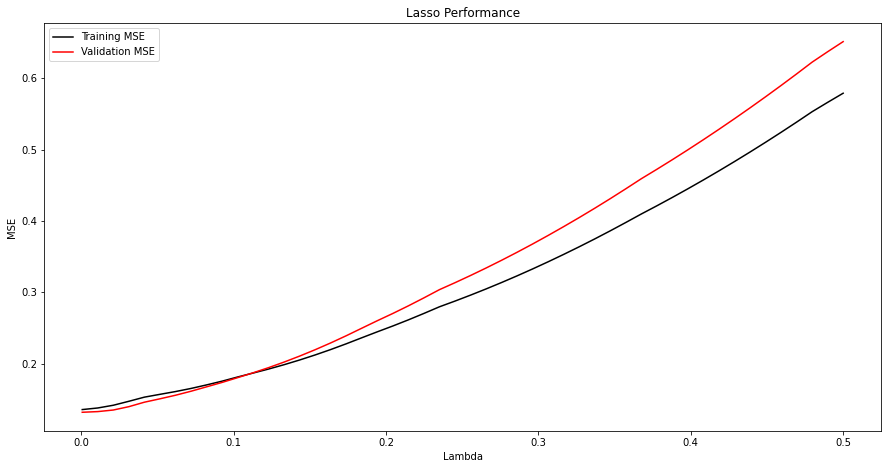

In [313]:
#plotting training x validation

fig=plt.figure(figsize=(15,7.5))
plt.title("Lasso Performance")
plt.plot(results[:,0], #accessing lambda values
         results[:,1], #accessing train MSE
        label = 'Training MSE',
         color='black'
        )

plt.plot(results[:,0], #accessing lambda values
         results[:,2], #accessing valid MSE
        label = 'Validation MSE',
         color='red'
        )
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.legend(loc='best')
plt.show()